load env ..
load env completed
policy
compute_avg_return ... 
 init buffer ... 
collected
dataset
train
save
root_dir /home/leiningc/project/data
train_dir /home/leiningc/project/data/trainbubble
End save para
step = 21000: loss = 74198.46875
save the agent
step = 21000: Average Return = -189.89999389648438
step = 22000: loss = 82865.6875
save the agent
step = 22000: Average Return = -196.1999969482422
step = 23000: loss = 14106.4248046875
save the agent
step = 23000: Average Return = -192.6999969482422
step = 24000: loss = 2565.498046875
save the agent
step = 24000: Average Return = -180.5
step = 25000: loss = 3152.12646484375
save the agent
step = 25000: Average Return = -170.0
step = 26000: loss = 774.3969116210938
save the agent
step = 26000: Average Return = -189.1999969482422
step = 27000: loss = 13.934288024902344
save the agent
step = 27000: Average Return = -181.39999389648438
step = 28000: loss = 1306.9122314453125
save the agent
step = 28000: Average Return = -200.3999938964

step = 100000: loss = 4063.693603515625
save the agent
step = 100000: Average Return = -167.3000030517578
step = 101000: loss = 1742.9202880859375
save the agent
step = 101000: Average Return = -145.39999389648438
step = 102000: loss = 2898.53466796875
save the agent
step = 102000: Average Return = -147.0
step = 103000: loss = 1208.40771484375
save the agent
step = 103000: Average Return = -146.89999389648438
step = 104000: loss = 1839.374267578125
save the agent
step = 104000: Average Return = -195.5
step = 105000: loss = 1219.9755859375
save the agent
step = 105000: Average Return = -196.6999969482422
step = 106000: loss = 1223.619140625
save the agent
step = 106000: Average Return = -158.1999969482422
step = 107000: loss = 2963.131591796875
save the agent
step = 107000: Average Return = -193.39999389648438
step = 108000: loss = 2211.13525390625
save the agent
step = 108000: Average Return = -182.1999969482422
step = 109000: loss = 1229.3485107421875
save the agent
step = 109000: Ave

step = 179000: Average Return = -178.1999969482422
step = 180000: loss = 3193.283203125
save the agent
step = 180000: Average Return = -146.8000030517578
step = 181000: loss = 1158.21435546875
save the agent
step = 181000: Average Return = -197.60000610351562
step = 182000: loss = 593.4240112304688
save the agent
step = 182000: Average Return = -196.8000030517578
step = 183000: loss = 1617.49072265625
save the agent
step = 183000: Average Return = -174.3000030517578
step = 184000: loss = 2111.273681640625
save the agent
step = 184000: Average Return = -192.89999389648438
step = 185000: loss = 1603.5963134765625
save the agent
step = 185000: Average Return = -178.89999389648438
step = 186000: loss = 2616.990966796875
save the agent
step = 186000: Average Return = -184.10000610351562
step = 187000: loss = 1051.292236328125
save the agent
step = 187000: Average Return = -196.10000610351562
step = 188000: loss = 2140.5146484375
save the agent
step = 188000: Average Return = -166.1000061035

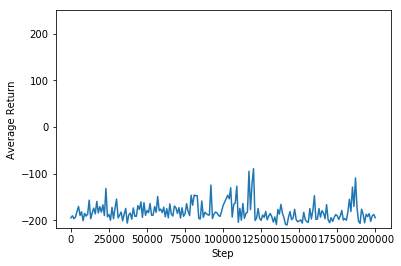

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import sys
import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import PIL.Image
import os
import tensorflow as tf
import gym_bubbleshooter
from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common
from tf_agents.metrics import py_metrics
from absl import flags
tf.compat.v1.enable_v2_behavior()
print("load env ..")

env_name =("BubbleShooter-v0")

print("load env completed")

num_iterations = 200000  # @param

initial_collect_steps = 1000  # @param
collect_steps_per_iteration = 1  # @param
replay_buffer_capacity = 100000  # @param

fc_layer_params = (100,)

batch_size = 64  # @param
learning_rate = 1e-3  # @param
log_interval = 200  # @param

num_eval_episodes = 10  # @param
eval_interval = 1000  # @param



env = suite_gym.load(env_name, discount=0.99, max_episode_steps=1000)

env.reset()

#print('Observation Spec:')
#print(env.time_step_spec().observation)
#print('Action Spec:')
#print(env.action_spec())

time_step = env.reset()
#print('Time step:')
#print(time_step)

action = 1

next_time_step = env.step(action)
#print('Next time step:')
#print(next_time_step)
train_py_env = suite_gym.load(env_name, discount=0.99, max_episode_steps=1000)
eval_py_env = suite_gym.load(env_name, discount=0.99, max_episode_steps=1000)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)



train_env.reset()
#print('Observation Spec:')
#print(train_env.time_step_spec().observation)
#print('board:')
#print("env")
#print(eval_env.reset())
#print('end')



q_net = q_network.QNetwork(
        train_env.observation_spec(),
        train_env.action_spec(),
        fc_layer_params=fc_layer_params)



optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.compat.v2.Variable(0)

tf_agent = dqn_agent.DqnAgent(
        train_env.time_step_spec(),
        train_env.action_spec(),
        q_network=q_net,
        optimizer=optimizer,
        td_errors_loss_fn=dqn_agent.element_wise_squared_loss,
        train_step_counter=train_step_counter)

tf_agent.initialize()

eval_policy = tf_agent.policy
collect_policy = tf_agent.collect_policy
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(), train_env.action_spec())
print("policy")

def compute_avg_return(environment, policy, num_episodes=10):
    total_return = 0.0
    for _ in range(num_episodes):
        time_step = environment.reset()
        episode_return = 0.0
        while not time_step.is_last():
            action_step = policy.action(time_step)
            time_step = environment.step(action_step.action)
            episode_return += time_step.reward
        total_return += episode_return
    avg_return = total_return / num_episodes
    return avg_return.numpy()[0]

print("compute_avg_return ... ")
compute_avg_return(eval_env, random_policy, num_eval_episodes)
#compute_avg_return(eval_env, random_policy)




replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
        data_spec=tf_agent.collect_data_spec, 
        batch_size=train_env.batch_size,
        max_length=replay_buffer_capacity)

print(" init buffer ... ")
def collect_step(environment, policy):
    time_step = environment.current_time_step()
    action_step = policy.action(time_step)
    next_time_step = environment.step(action_step.action)
    traj = trajectory.from_transition(time_step, action_step, next_time_step)
    # Add trajectory to the replay buffer
    replay_buffer.add_batch(traj)

for _ in range(initial_collect_steps):
    collect_step(train_env, random_policy)
print("collected")
dataset = replay_buffer.as_dataset(
        num_parallel_calls=3, sample_batch_size=batch_size,
        num_steps=2).prefetch(3)

print("dataset")
iterator = iter(dataset)

print("train")
# (Optional) Optimize by wrapping some of the code in a graph using TF function.
tf_agent.train = common.function(tf_agent.train)

# Reset the train step
tf_agent.train_step_counter.assign(0)


# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, tf_agent.policy, num_eval_episodes)
returns = [avg_return]


print("save")

#flags.DEFINE_string('root_dir', os.getenv('TEST_UNDECLARED_OUTPUTS_DIR'), 'Root directory for writing logs/summaries/checkpoints.')
#flags.DEFINE_integer('num_iterations', 100000, 'Total number train/eval iterations to perform.')
#flags.DEFINE_bool('use_ddqn', False, 'If True uses the DdqnAgent instead of the DqnAgent.')
#flags.mark_flag_as_required('root_dir')

train_checkpoint_interval=10000
policy_checkpoint_interval=5000
rb_checkpoint_interval=2000
log_interval=1000
summary_interval=1000
summaries_flush_secs=10
agent_class=dqn_agent.DqnAgent
debug_summaries=False
summarize_grads_and_vars=False

#FLAGS = flags.FLAGS
#root_dir = FLAGS.root_dir
root_dir = "/home/leiningc/project/data"
root_dir = os.path.expanduser(root_dir)
train_dir = os.path.join(root_dir, 'trainbubble')
eval_dir = os.path.join(root_dir, 'eval')
print("root_dir", root_dir)
print("train_dir", train_dir)


train_metrics = [
        tf_metrics.NumberOfEpisodes(),
        tf_metrics.EnvironmentSteps(),
        tf_metrics.AverageReturnMetric(),
        tf_metrics.AverageEpisodeLengthMetric(),
        ]

global_step = tf.compat.v1.train.get_or_create_global_step()

#train_summary_writer = tf.compat.v2.summary.create_file_writer(train_dir, flush_millis=summaries_flush_secs * 1000)
#train_summary_writer.set_as_default()
train_checkpointer = common.Checkpointer(
        ckpt_dir=train_dir,
        agent=tf_agent,
        global_step=global_step,
        metrics=metric_utils.MetricsGroup(train_metrics,
            'train_metrics'))



print("End save para")







for _ in range(num_iterations):
   
    # Collect a few steps using collect_policy and save to the replay buffer.
    for _ in range(collect_steps_per_iteration):
        collect_step(train_env, tf_agent.collect_policy)
        
    # Sample a batch of data from the buffer and update the
    # agent's network.
    experience, unused_info = next(iterator)
    train_loss = tf_agent.train(experience)
    step = tf_agent.train_step_counter.numpy()
    if step % log_interval == 0:
        print('step = {0}: loss = {1}'.format(step, train_loss.loss))
    
    if step % eval_interval == 0:
        print("save the agent")
        train_checkpointer.save(global_step=step)

    if step % eval_interval == 0:
        avg_return = compute_avg_return(eval_env, tf_agent.policy, num_eval_episodes)
        print('step = {0}: Average Return = {1}'.format(step, avg_return))
        returns.append(avg_return)

steps = range(0, num_iterations + 1, eval_interval)
plt.plot(steps, returns)
plt.ylabel('Average Return')
plt.xlabel('Step')
plt.ylim(top=250)
plt.show()

In [ ]:
pwd

In [16]:
import sys
sys.path

['',
 '/home/leiningc/anaconda3/envs/sim/lib/python35.zip',
 '/home/leiningc/anaconda3/envs/sim/lib/python3.5',
 '/home/leiningc/anaconda3/envs/sim/lib/python3.5/plat-linux',
 '/home/leiningc/anaconda3/envs/sim/lib/python3.5/lib-dynload',
 '/home/leiningc/anaconda3/envs/sim/lib/python3.5/site-packages',
 '/home/leiningc/anaconda3/envs/sim/lib/python3.5/site-packages/IPython/extensions',
 '/home/leiningc/.ipython',
 '/home/leiningc/project/gym_env/gym-bubbleshooter']

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import sys
import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import PIL.Image
import tensorflow as tf
import gym_bubbleshooter
from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common
tf.compat.v1.enable_v2_behavior()
print("load env ..")
env_cart = 'CartPole-v0'  # @param
env_name =("BubbleShooter-v0")
num_iterations = 8000  # @param
print("load env completed")

load env ..
load env completed


In [5]:
initial_collect_steps = 1000  # @param
collect_steps_per_iteration = 1  # @param
replay_buffer_capacity = 100000  # @param

fc_layer_params = (100,)

batch_size = 64  # @param
learning_rate = 1e-3  # @param
log_interval = 200  # @param

num_eval_episodes = 10  # @param
eval_interval = 1000  # @param


env = suite_gym.load(env_name, discount=0.99, max_episode_steps=1000)

env.reset()



train_py_env = suite_gym.load(env_name, discount=0.99, max_episode_steps=1000)
eval_py_env = suite_gym.load(env_name, discount=0.99, max_episode_steps=1000)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)



train_env.reset()
q_net = q_network.QNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=fc_layer_params)

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
 
train_step_counter = tf.compat.v2.Variable(0)



In [3]:
import gym

In [19]:
env = gym.make("BubbleShooter-v0")
state = env.reset()
len(state['board'])

224

In [6]:
tf_agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=dqn_agent.element_wise_squared_loss,
    train_step_counter=train_step_counter)

In [7]:
tf_agent.initialize()

In [8]:
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=tf_agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_capacity)

In [9]:
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, sample_batch_size=batch_size,
    num_steps=2).prefetch(3)


In [10]:
iterator = iter(dataset)


In [11]:
tf_agent.train = common.function(tf_agent.train)


In [21]:
env.observation_space.shape

(196,)

In [13]:
state = env.reset()
state

TypeError: int() argument must be a string, a bytes-like object or a number, not 'dict'

In [10]:
obs = env.observation_spec()
obs

BoundedArraySpec(shape=(196,), dtype=dtype('int32'), name=None, minimum=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0], maximum=[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6])

In [3]:
cart_env = suite_gym.load(env_cart, discount=0.99, max_episode_steps=1000)

In [3]:
env.reset()

print('Observation Spec:')
print(env.time_step_spec().observation)
print('Action Spec:')

Observation Spec:
OrderedDict([('board', BoundedArraySpec(shape=(196,), dtype=dtype('int32'), name=None, minimum=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0], maximum=[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6]))])
Action Spec:


In [14]:


env.reset()

print('Observation Spec:')
print(env.time_step_spec().observation)
print('Action Spec:')
print(env.action_spec())

time_step = env.reset()
print('Time step:')
print(time_step)

action = 1

next_time_step = env.step(action)
print('Next time step:')
print(next_time_step)

train_py_env = suite_gym.load(env_name, discount=0.99, max_episode_steps=1000)
eval_py_env = suite_gym.load(env_name, discount=0.99, max_episode_steps=1000)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)



train_env.reset()
print('Observation Spec:')
print(train_env.time_step_spec().observation)



Observation Spec:
OrderedDict([('board', BoundedArraySpec(shape=(196,), dtype=dtype('int32'), name=None, minimum=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0], maximum=[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6])), ('next_bubble', BoundedArraySpec(shape=(), dtype=dtype('int64'), name=None, m

In [18]:
cart_train_py_env = suite_gym.load(env_cart, discount=0.99, max_episode_steps=1000)
cart_eval_py_env = suite_gym.load(env_cart, discount=0.99, max_episode_steps=1000)

cart_train_env = tf_py_environment.TFPyEnvironment(cart_train_py_env)
cart_eval_env = tf_py_environment.TFPyEnvironment(cart_eval_py_env)

In [13]:
train_py_env = suite_gym.load(env_name, discount=0.99, max_episode_steps=1000)
eval_py_env = suite_gym.load(env_name, discount=0.99, max_episode_steps=1000)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

In [21]:
ob = train_env.observation_spec()
type(ob['board'])

tensorflow.python.framework.tensor_spec.BoundedTensorSpec

In [23]:
type(ob)

collections.OrderedDict

In [22]:
type(cart_train_env.observation_spec())

tensorflow.python.framework.tensor_spec.BoundedTensorSpec

In [19]:
cart_train_env.observation_spec()

BoundedTensorSpec(shape=(4,), dtype=tf.float32, name=None, minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32))

In [6]:
for x in ob:
    print("n", x)

n board


In [7]:
train_env.observation_spec()["board"]

BoundedTensorSpec(shape=(196,), dtype=tf.int32, name=None, minimum=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32), maximum=array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 

In [46]:
14*16

224

In [25]:
cart_train_env.time_step_spec()

TimeStep(step_type=TensorSpec(shape=(), dtype=tf.int32, name='step_type'), reward=TensorSpec(shape=(), dtype=tf.float32, name='reward'), discount=BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)), observation=BoundedTensorSpec(shape=(4,), dtype=tf.float32, name=None, minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)))

In [45]:
train_env.reset()

TimeStep(step_type=<tf.Tensor: id=18, shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, reward=<tf.Tensor: id=19, shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, discount=<tf.Tensor: id=20, shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, observation=OrderedDict([('board', <tf.Tensor: id=21, shape=(1, 224), dtype=int32, numpy=
array([[5, 3, 3, 6, 6, 5, 4, 2, 1, 1, 3, 3, 1, 1, 0, 6, 1, 6, 1, 4, 3, 3,
        1, 0, 0, 6, 5, 1, 1, 6, 1, 6, 5, 1, 2, 5, 6, 5, 6, 3, 0, 1, 5, 5,
        6, 6, 1, 6, 4, 3, 0, 4, 0, 6, 2, 6, 5, 4, 4, 5, 0, 5, 4, 6, 6, 6,
        5, 0, 2, 0, 3, 4, 3, 6, 4, 6, 1, 5, 5, 3, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7

In [24]:
train_env.time_step_spec()

TimeStep(step_type=TensorSpec(shape=(), dtype=tf.int32, name='step_type'), reward=TensorSpec(shape=(), dtype=tf.float32, name='reward'), discount=BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)), observation=OrderedDict([('board', BoundedTensorSpec(shape=(196,), dtype=tf.int32, name=None, minimum=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
for x in train_env.time_step_spec():
    print("y", x)

y TensorSpec(shape=(), dtype=tf.int32, name='step_type')
y TensorSpec(shape=(), dtype=tf.float32, name='reward')
y BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32))
y OrderedDict([('board', BoundedTensorSpec(shape=(196,), dtype=tf.int32, name=None, minimum=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtyp

In [26]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(), train_env.action_spec())


In [44]:
train_env.time_step_spec().observation

OrderedDict([('board',
              BoundedTensorSpec(shape=(196,), dtype=tf.int32, name=None, minimum=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    dtype=int32), maximum=array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
                 

In [41]:
state

TimeStep(step_type=<tf.Tensor: id=8, shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, reward=<tf.Tensor: id=9, shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, discount=<tf.Tensor: id=10, shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, observation=OrderedDict([('board', <tf.Tensor: id=11, shape=(1, 224), dtype=int32, numpy=
array([[1, 4, 5, 3, 0, 5, 3, 5, 3, 2, 1, 6, 3, 2, 2, 3, 3, 4, 4, 5, 2, 0,
        4, 2, 4, 6, 2, 4, 6, 5, 4, 3, 1, 3, 3, 1, 5, 2, 0, 0, 3, 1, 5, 3,
        2, 0, 5, 2, 2, 0, 6, 6, 4, 5, 2, 5, 5, 2, 5, 4, 0, 5, 1, 0, 0, 4,
        2, 6, 5, 3, 1, 4, 5, 6, 2, 6, 0, 3, 3, 2, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

In [31]:
state = train_env.reset()

In [36]:
train_env.observation_spec()

OrderedDict([('board',
              BoundedTensorSpec(shape=(196,), dtype=tf.int32, name=None, minimum=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    dtype=int32), maximum=array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
                 

In [34]:
cart_train_env.reset()

TimeStep(step_type=<tf.Tensor: id=12, shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, reward=<tf.Tensor: id=13, shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, discount=<tf.Tensor: id=14, shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, observation=<tf.Tensor: id=15, shape=(1, 4), dtype=float32, numpy=
array([[-0.00490616,  0.03789723, -0.02988659, -0.03203917]],
      dtype=float32)>)

In [32]:
state

TimeStep(step_type=<tf.Tensor: id=8, shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, reward=<tf.Tensor: id=9, shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, discount=<tf.Tensor: id=10, shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, observation=OrderedDict([('board', <tf.Tensor: id=11, shape=(1, 224), dtype=int32, numpy=
array([[1, 4, 5, 3, 0, 5, 3, 5, 3, 2, 1, 6, 3, 2, 2, 3, 3, 4, 4, 5, 2, 0,
        4, 2, 4, 6, 2, 4, 6, 5, 4, 3, 1, 3, 3, 1, 5, 2, 0, 0, 3, 1, 5, 3,
        2, 0, 5, 2, 2, 0, 6, 6, 4, 5, 2, 5, 5, 2, 5, 4, 0, 5, 1, 0, 0, 4,
        2, 6, 5, 3, 1, 4, 5, 6, 2, 6, 0, 3, 3, 2, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

In [30]:
random_policy.action(state)

W0716 14:16:13.832557 140373639632640 module_wrapper.py:126] From /home/leiningc/anaconda3/envs/sim/lib/python3.5/site-packages/tensorflow_core/python/util/module_wrapper.py:153: The name tf.estimator.inputs is deprecated. Please use tf.compat.v1.estimator.inputs instead.



ValueError: Received a mix of batched and unbatched Tensors, or Tensors are not compatible with Specs.  num_outer_dims: 1.
Saw tensor_shapes:
   TimeStep(step_type=TensorShape([1]), reward=TensorShape([1]), discount=TensorShape([1]), observation=OrderedDict([('board', TensorShape([1, 224]))]))
And spec_shapes:
   TimeStep(step_type=TensorShape([]), reward=TensorShape([]), discount=TensorShape([]), observation=OrderedDict([('board', TensorShape([196]))]))

In [48]:
import gym
import gym_bubbleshooter

In [50]:
env = gym.make("BubbleShooter-v0")
state = env.reset()

In [55]:
len(state['board'])


224

In [64]:
obs = env.observation_space
obs

Dict(board:MultiDiscrete([7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7]))

In [68]:
type(obs)

gym.spaces.dict_space.Dict

In [74]:
env = gym.make("CartPole-v0")
env.observation_space

Box(4,)

In [75]:
from gym import spaces, error

In [78]:
ob = spaces.MultiDiscrete([x for x in range(1,100)])

In [79]:
ob.shape

(99,)